## Pokemon Machine Learning 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('Pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


## Data Cleaning


In [3]:
df=df.drop(['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water','japanese_name','generation','pokedex_number','type2','type1','attack',
           'defense','hp','sp_attack','sp_defense', 'speed','percentage_male','abilities','classfication','name'],axis=1)

In [4]:
df.columns

Index(['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'experience_growth', 'height_m', 'weight_kg', 'is_legendary'],
      dtype='object')

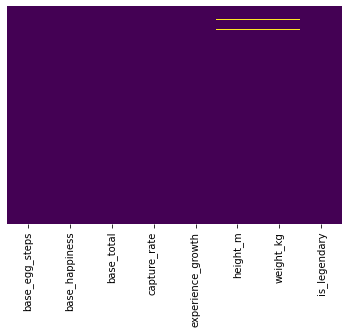

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df['capture_rate'] = df['capture_rate'].apply(lambda x:x.split()[0])
df['capture_rate']=df['capture_rate'].astype(float)

In [7]:
df.describe()

,base_egg_steps,base_happiness,base_total,capture_rate,experience_growth,height_m,weight_kg,is_legendary
count,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,781.000000,801.000000
mean,7191.011236,65.362047,428.377029,98.675406,1.054996e+06,1.163892,61.378105,0.087391
std,6558.220422,19.598948,119.203577,76.248866,1.602558e+05,1.080326,109.354766,0.282583
min,1280.000000,0.000000,180.000000,3.000000,6.000000e+05,0.100000,0.100000,0.000000
25%,5120.000000,70.000000,320.000000,45.000000,1.000000e+06,0.600000,9.000000,0.000000
50%,5120.000000,70.000000,435.000000,60.000000,1.000000e+06,1.000000,27.300000,0.000000
75%,6400.000000,70.000000,505.000000,170.000000,1.059860e+06,1.500000,64.800000,0.000000
max,30720.000000,140.000000,780.000000,255.000000,1.640000e+06,14.500000,999.900000,1.000000


In [8]:
df.isna().sum()

base_egg_steps        0
base_happiness        0
base_total            0
capture_rate          0
experience_growth     0
height_m             20
weight_kg            20
is_legendary          0
dtype: int64

In [9]:
#Nan pela mediana
df['weight_kg']=df['weight_kg'].fillna(df['weight_kg'].median())
df['height_m']=df['height_m'].fillna(df['height_m'].median())
df.isna().sum()

base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
experience_growth    0
height_m             0
weight_kg            0
is_legendary         0
dtype: int64

## Data Analysis

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


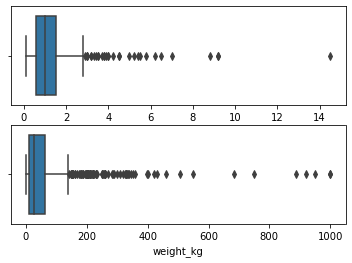

In [10]:
plt.subplot(2, 1, 1)
print(sns.boxplot(x=df['height_m'],hue=df['is_legendary']))
plt.subplot(2, 1, 2)
print(sns.boxplot(x=df['weight_kg'],hue=df['is_legendary']))

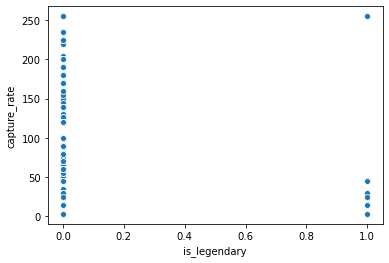

In [11]:
sns.scatterplot(x=df['is_legendary'],y=df['capture_rate'])

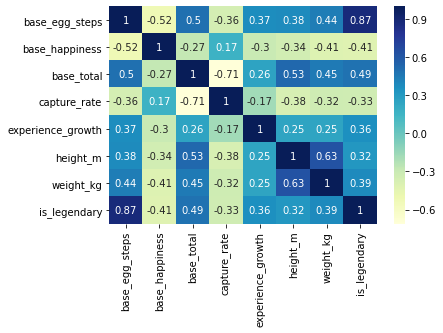

In [12]:
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


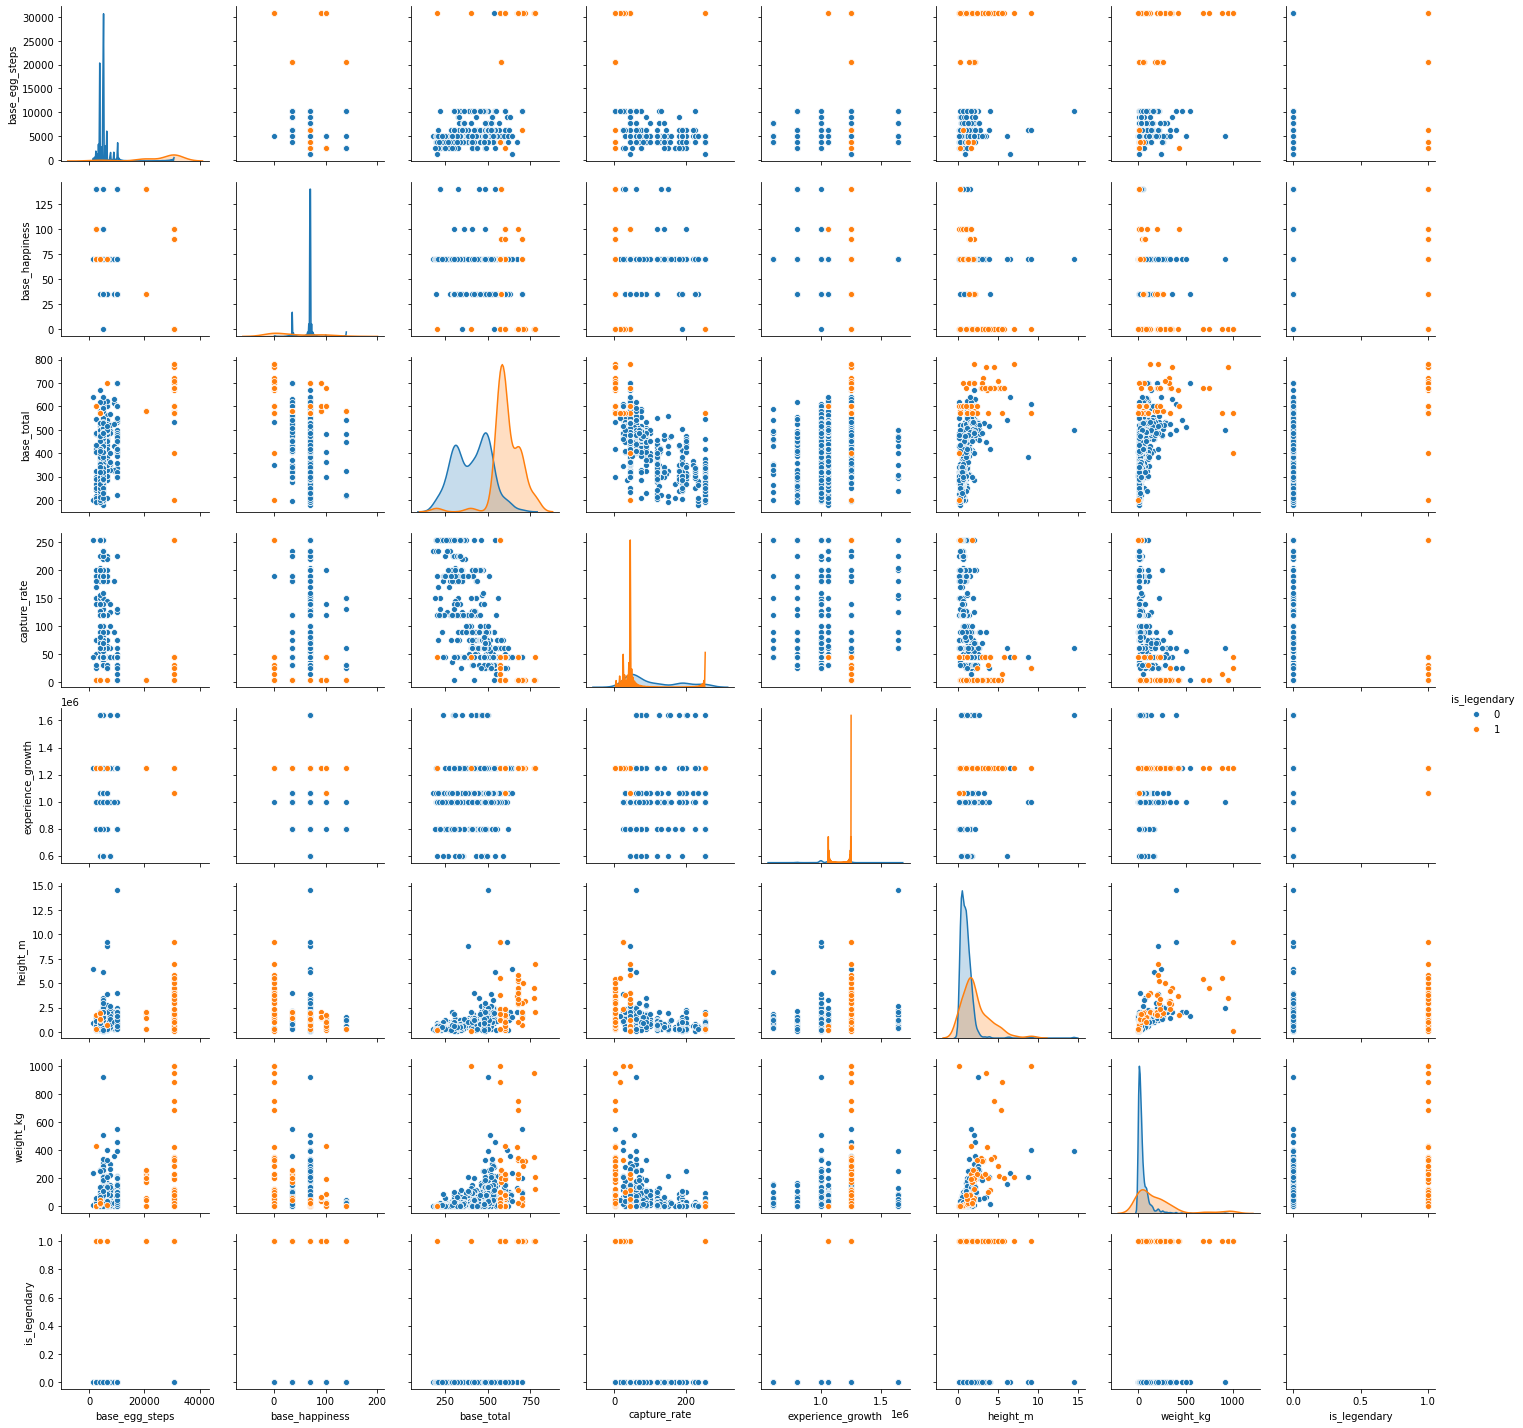

In [13]:
sns.pairplot(df,hue='is_legendary')

## Machine Learning

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   base_egg_steps     801 non-null    int64  
 1   base_happiness     801 non-null    int64  
 2   base_total         801 non-null    int64  
 3   capture_rate       801 non-null    float64
 4   experience_growth  801 non-null    int64  
 5   height_m           801 non-null    float64
 6   weight_kg          801 non-null    float64
 7   is_legendary       801 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 50.2 KB


In [16]:
X=df.drop(['is_legendary'],axis=1)
y=df['is_legendary']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
pred=dtree.predict(X_test)

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       0.94      1.00      0.97        17

    accuracy                           1.00       241
   macro avg       0.97      1.00      0.98       241
weighted avg       1.00      1.00      1.00       241



In [23]:
print(confusion_matrix(y_test,pred))

[[223   1]
 [  0  17]]


In [24]:
from sklearn import tree

[Text(1550.0, 1141.5600000000002, 'base_egg_steps <= 15360.0\ngini = 0.171\nsamples = 100.0%\nvalue = [0.905, 0.095]'),
 Text(930.0, 815.4000000000001, 'capture_rate <= 14.0\ngini = 0.027\nsamples = 91.6%\nvalue = [0.986, 0.014]'),
 Text(620.0, 489.24, 'base_happiness <= 52.5\ngini = 0.346\nsamples = 1.6%\nvalue = [0.222, 0.778]'),
 Text(310.0, 163.07999999999993, 'gini = 0.0\nsamples = 0.4%\nvalue = [1.0, 0.0]'),
 Text(930.0, 163.07999999999993, 'gini = 0.0\nsamples = 1.2%\nvalue = [0.0, 1.0]'),
 Text(1240.0, 489.24, 'gini = 0.0\nsamples = 90.0%\nvalue = [1.0, 0.0]'),
 Text(2170.0, 815.4000000000001, 'base_total <= 552.0\ngini = 0.042\nsamples = 8.4%\nvalue = [0.021, 0.979]'),
 Text(1860.0, 489.24, 'capture_rate <= 24.0\ngini = 0.444\nsamples = 0.5%\nvalue = [0.333, 0.667]'),
 Text(1550.0, 163.07999999999993, 'gini = 0.0\nsamples = 0.2%\nvalue = [1.0, 0.0]'),
 Text(2170.0, 163.07999999999993, 'gini = 0.0\nsamples = 0.4%\nvalue = [0.0, 1.0]'),
 Text(2480.0, 489.24, 'gini = 0.0\nsamples

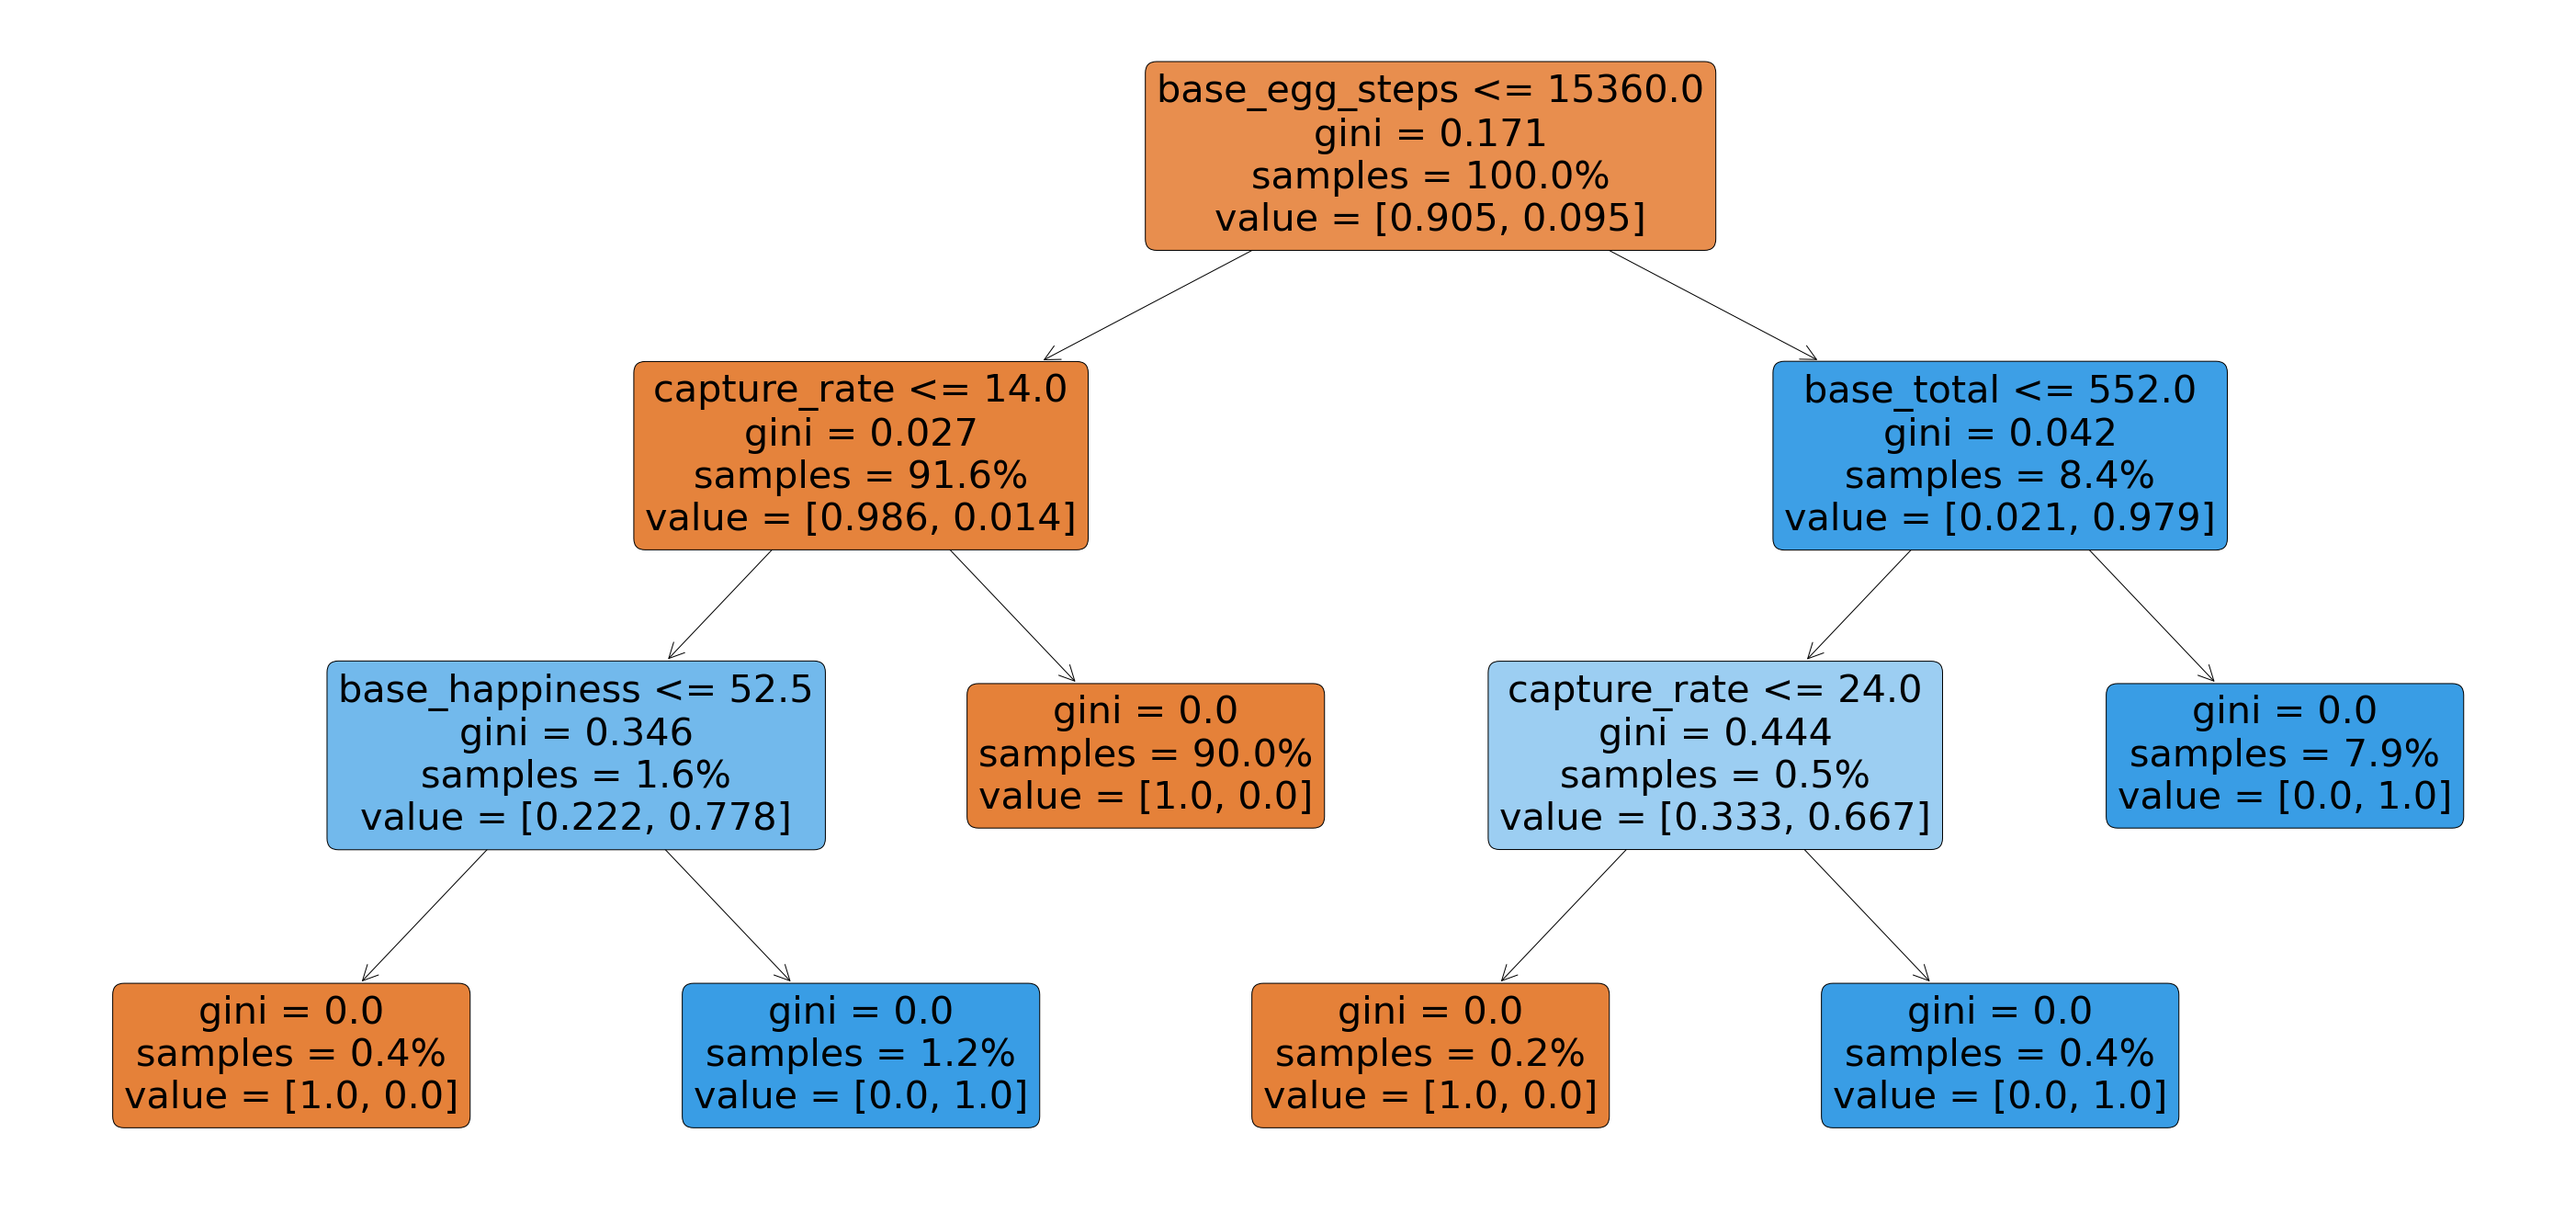

In [25]:
fig, ax = plt.subplots(figsize=(50, 24))
tree.plot_tree(dtree,feature_names=['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'experience_growth', 'height_m', 'weight_kg',],filled=True,proportion=bool,rounded=True)

## Random Forests

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
rfc_pred = rfc.predict(X_test)
(confusion_matrix(y_test,rfc_pred))

array([[223,   1],
       [  0,  17]], dtype=int64)

In [28]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       0.94      1.00      0.97        17

    accuracy                           1.00       241
   macro avg       0.97      1.00      0.98       241
weighted avg       1.00      1.00      1.00       241



## Plotando as 6 primeiras random forest

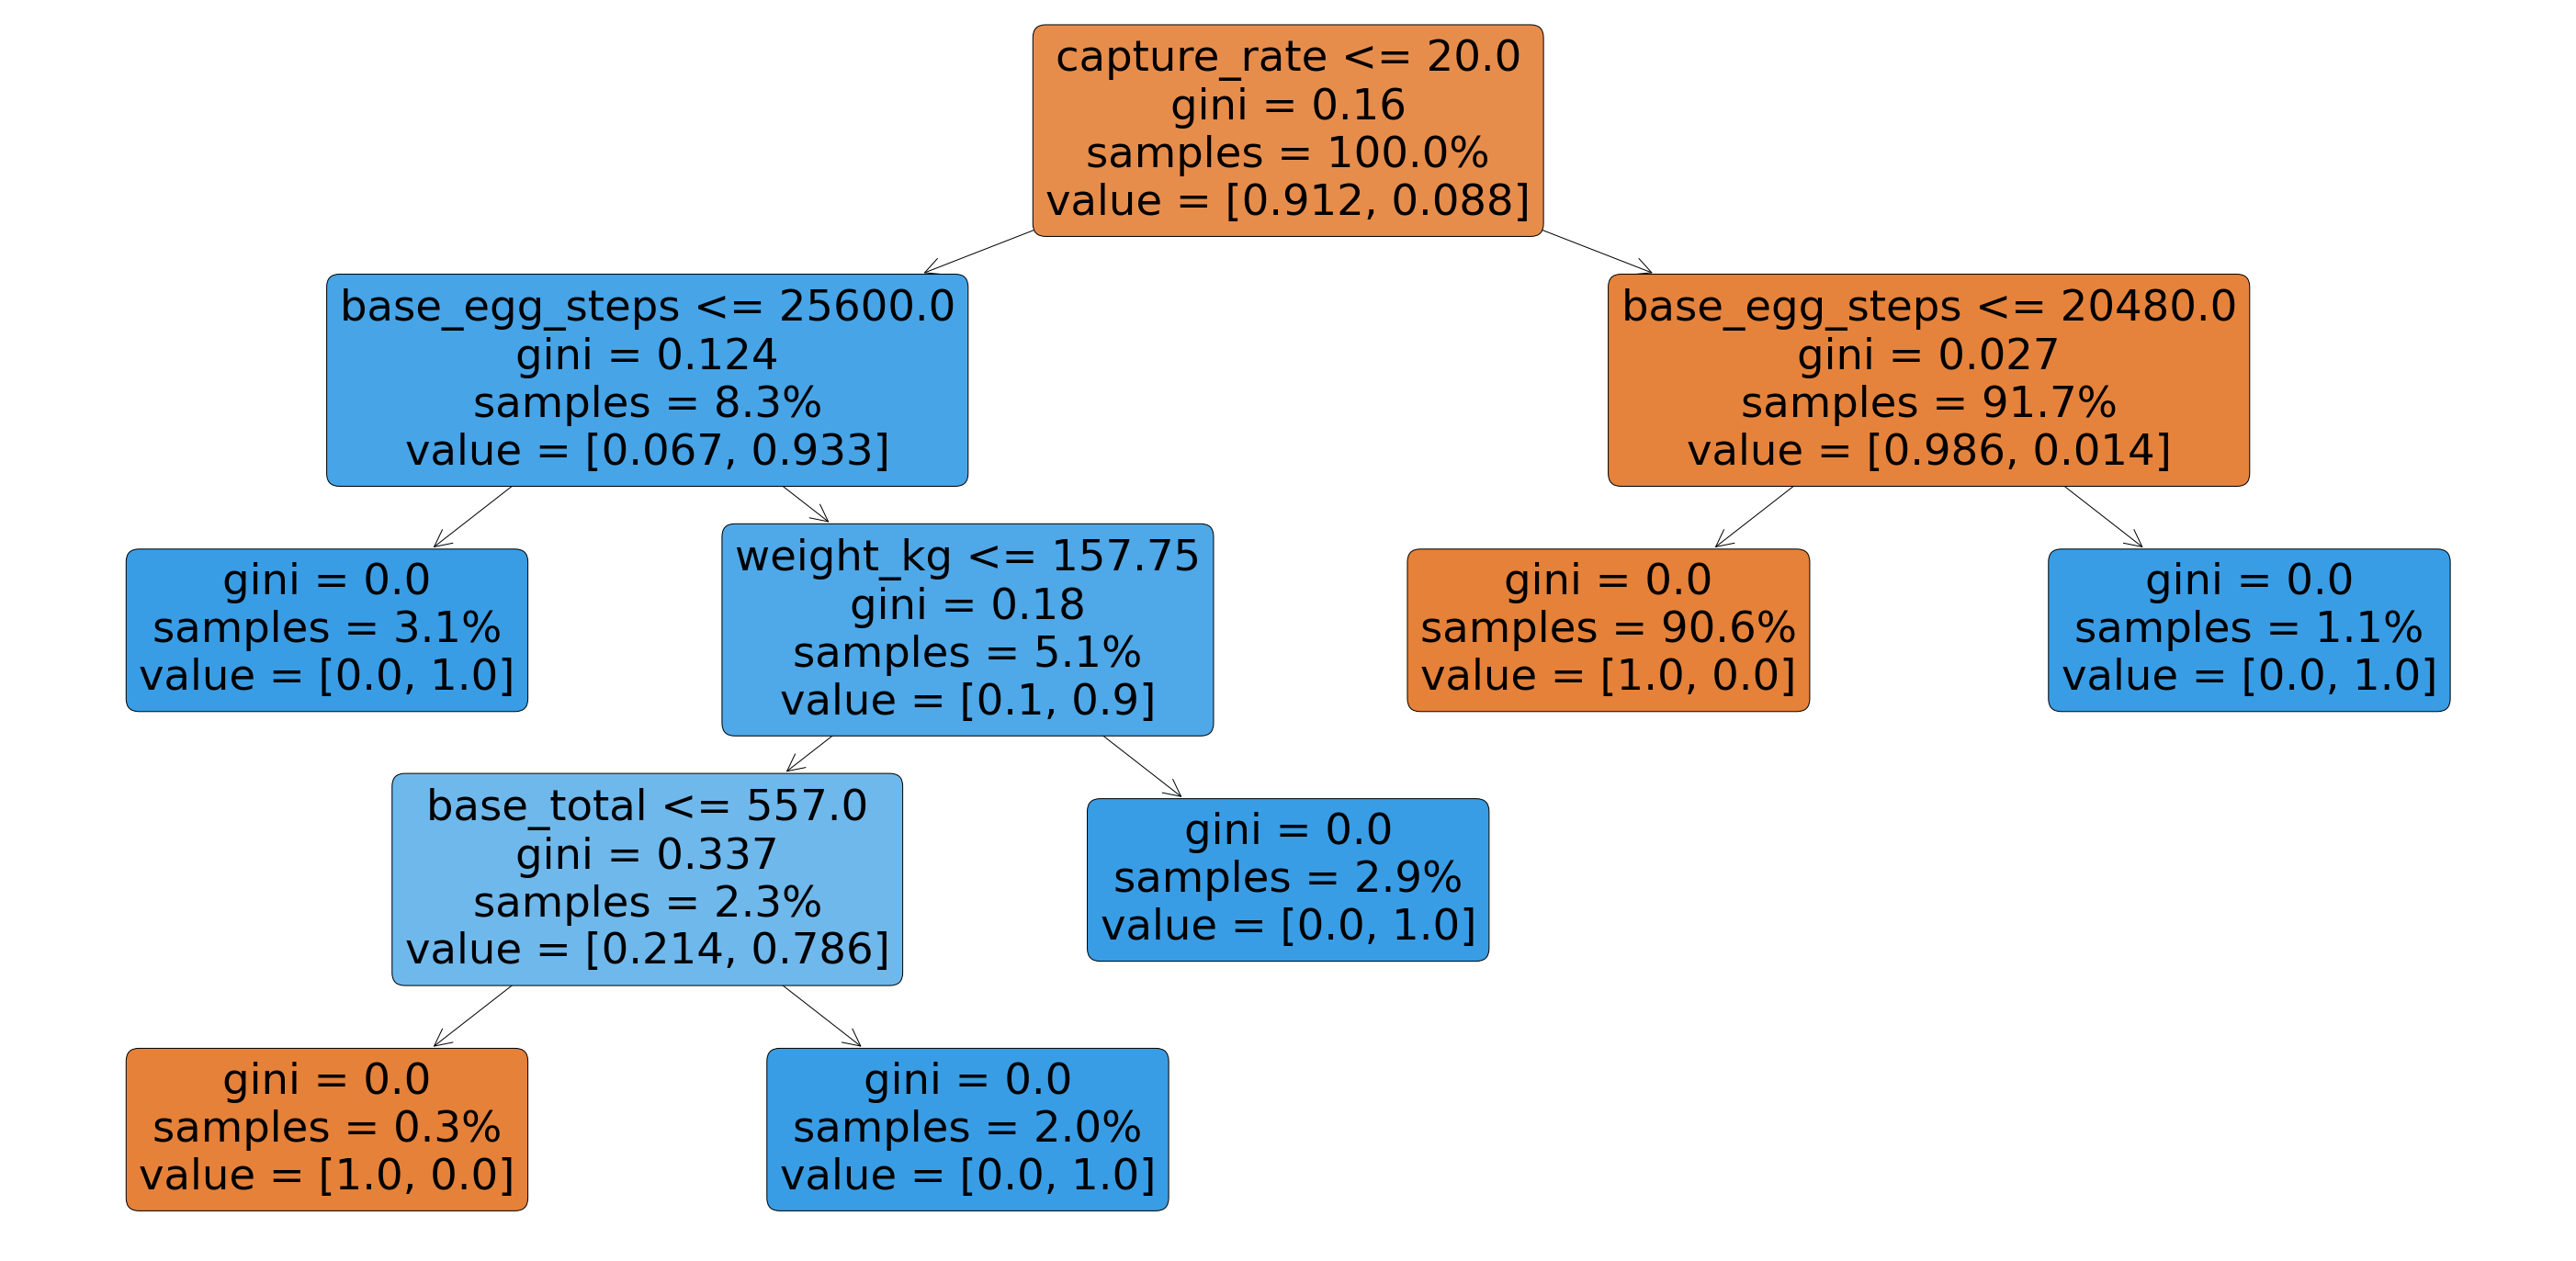

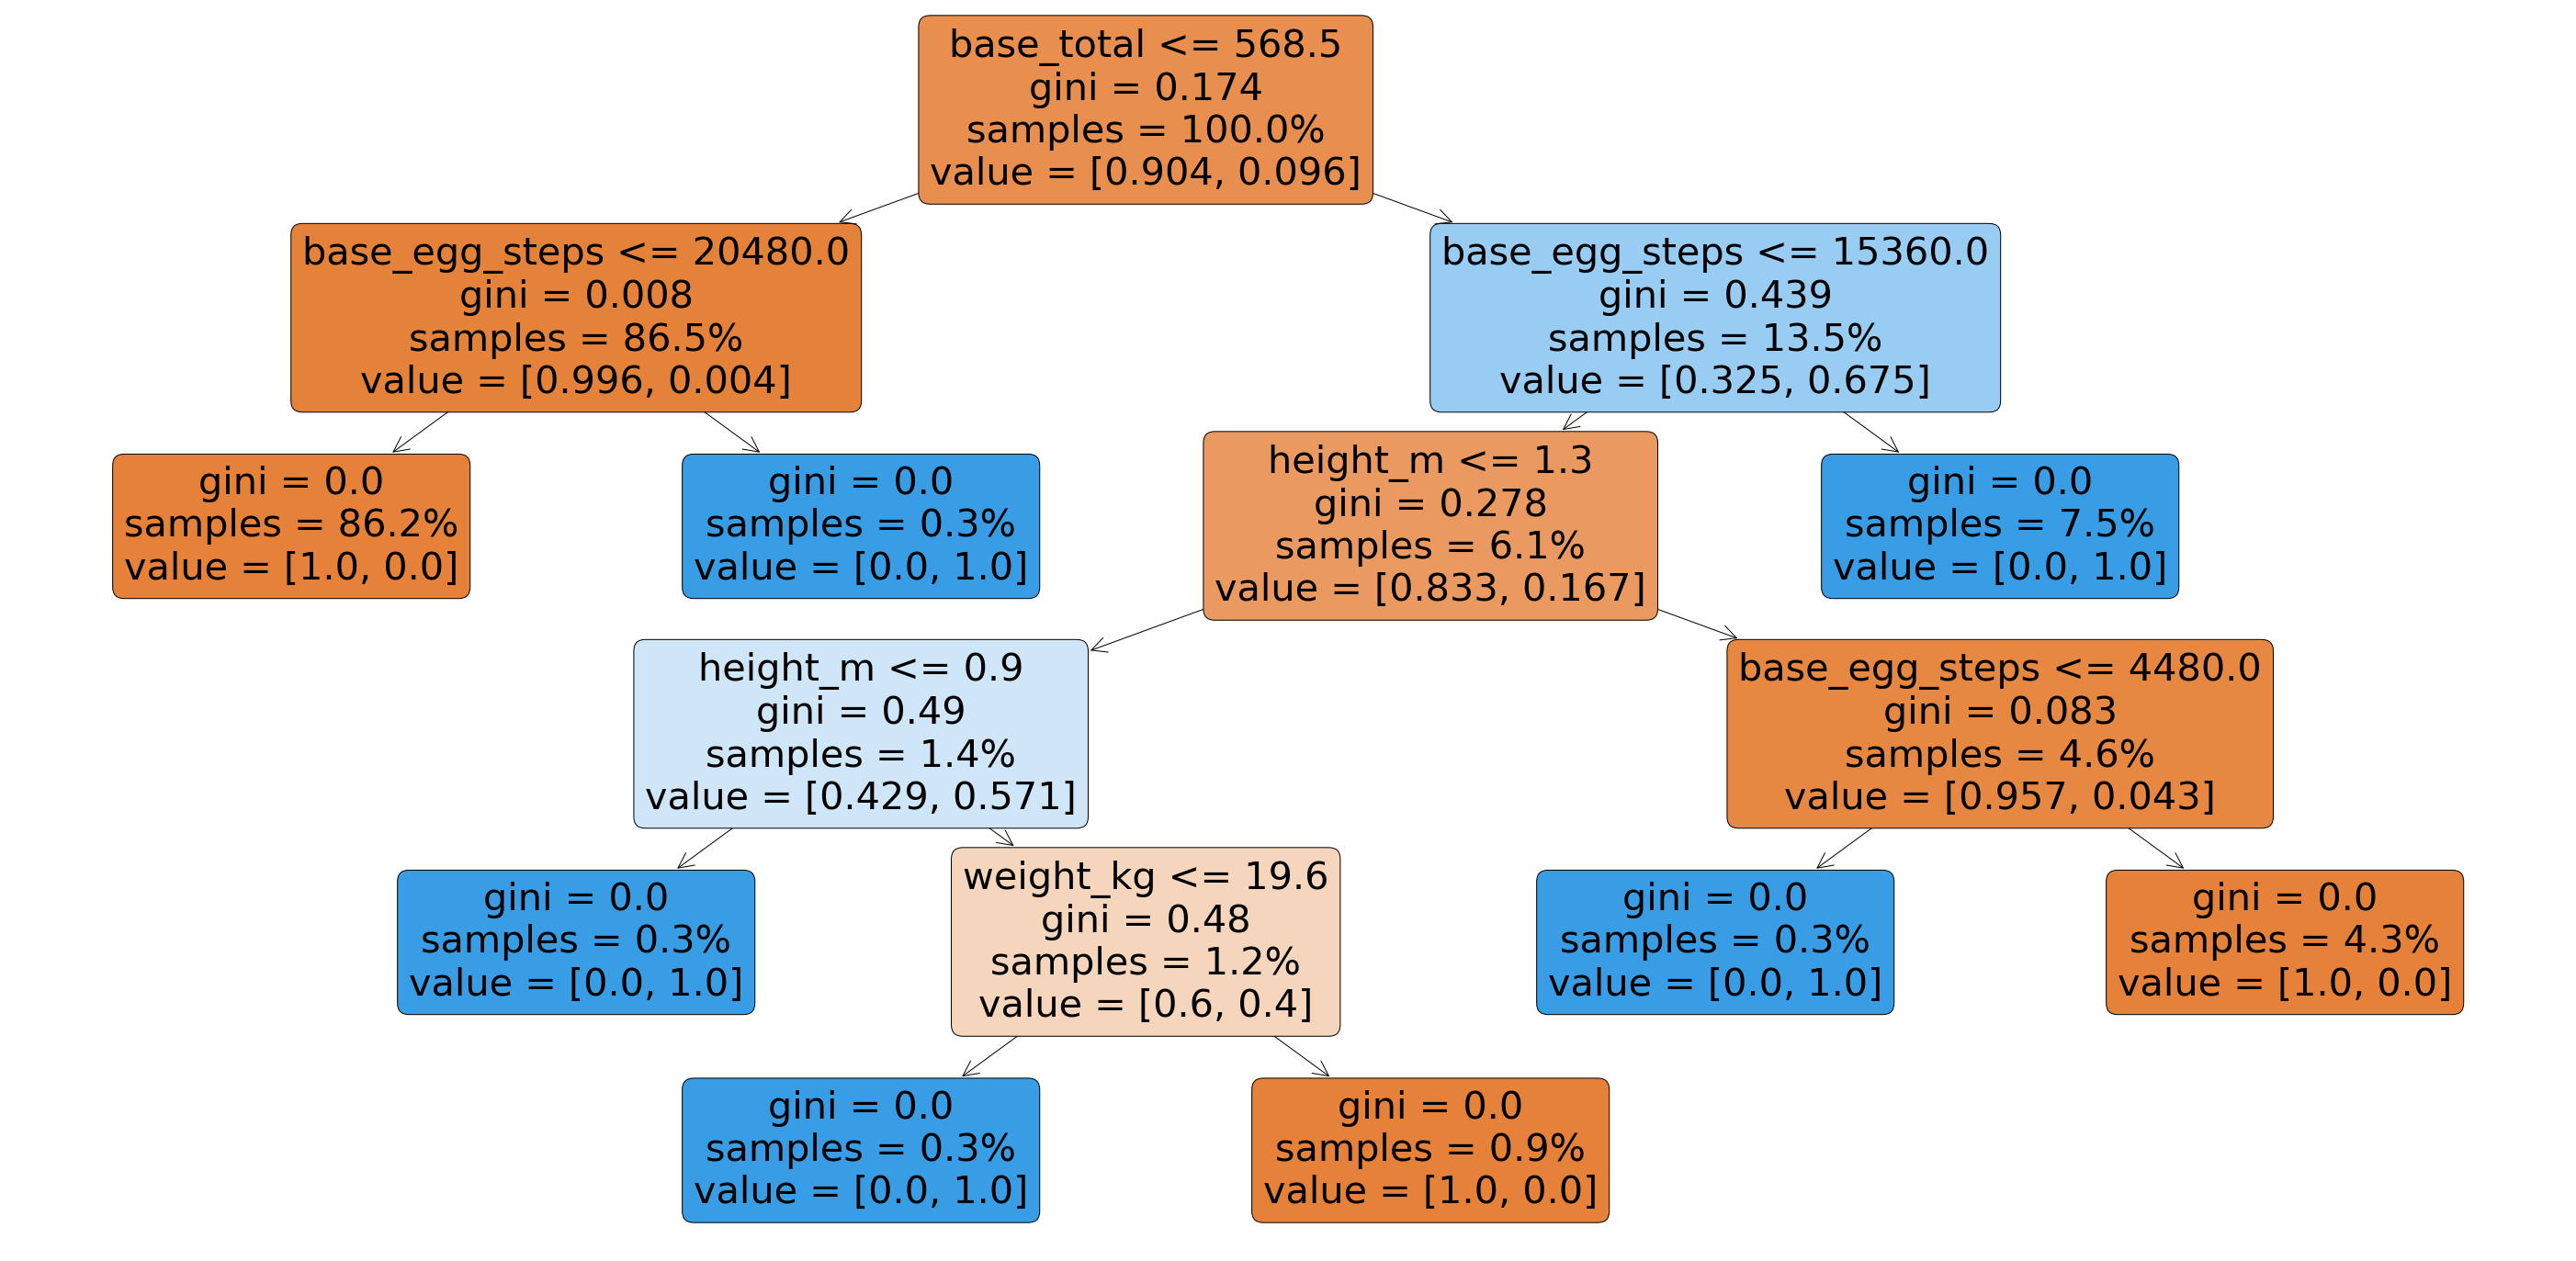

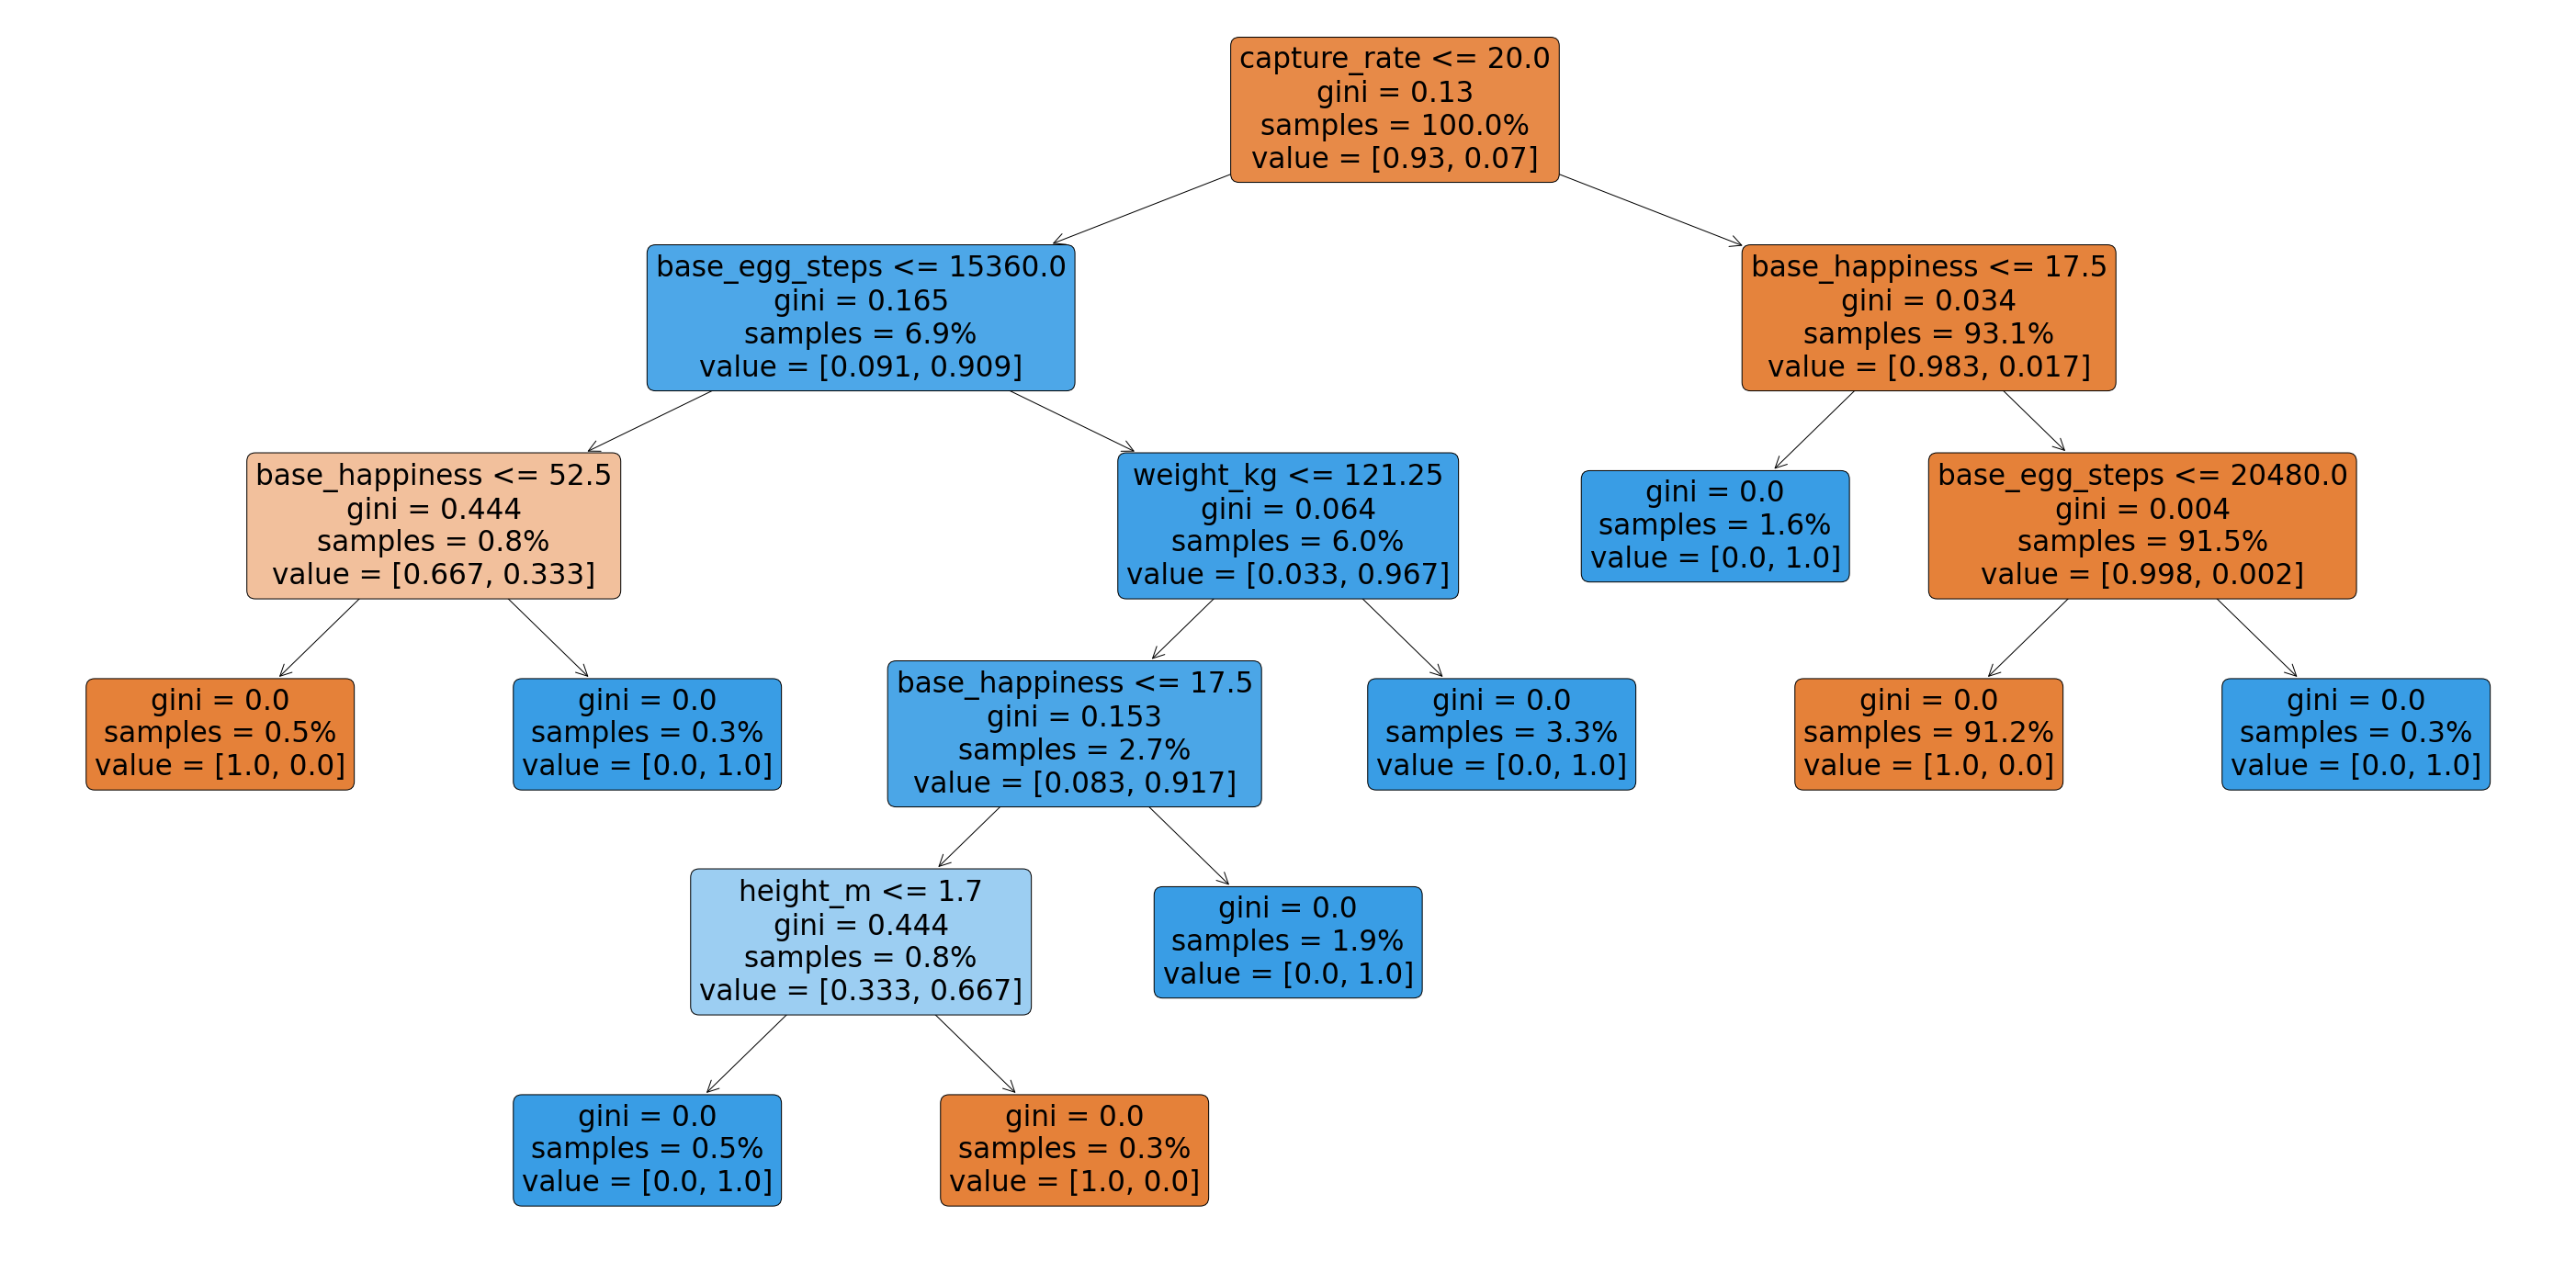

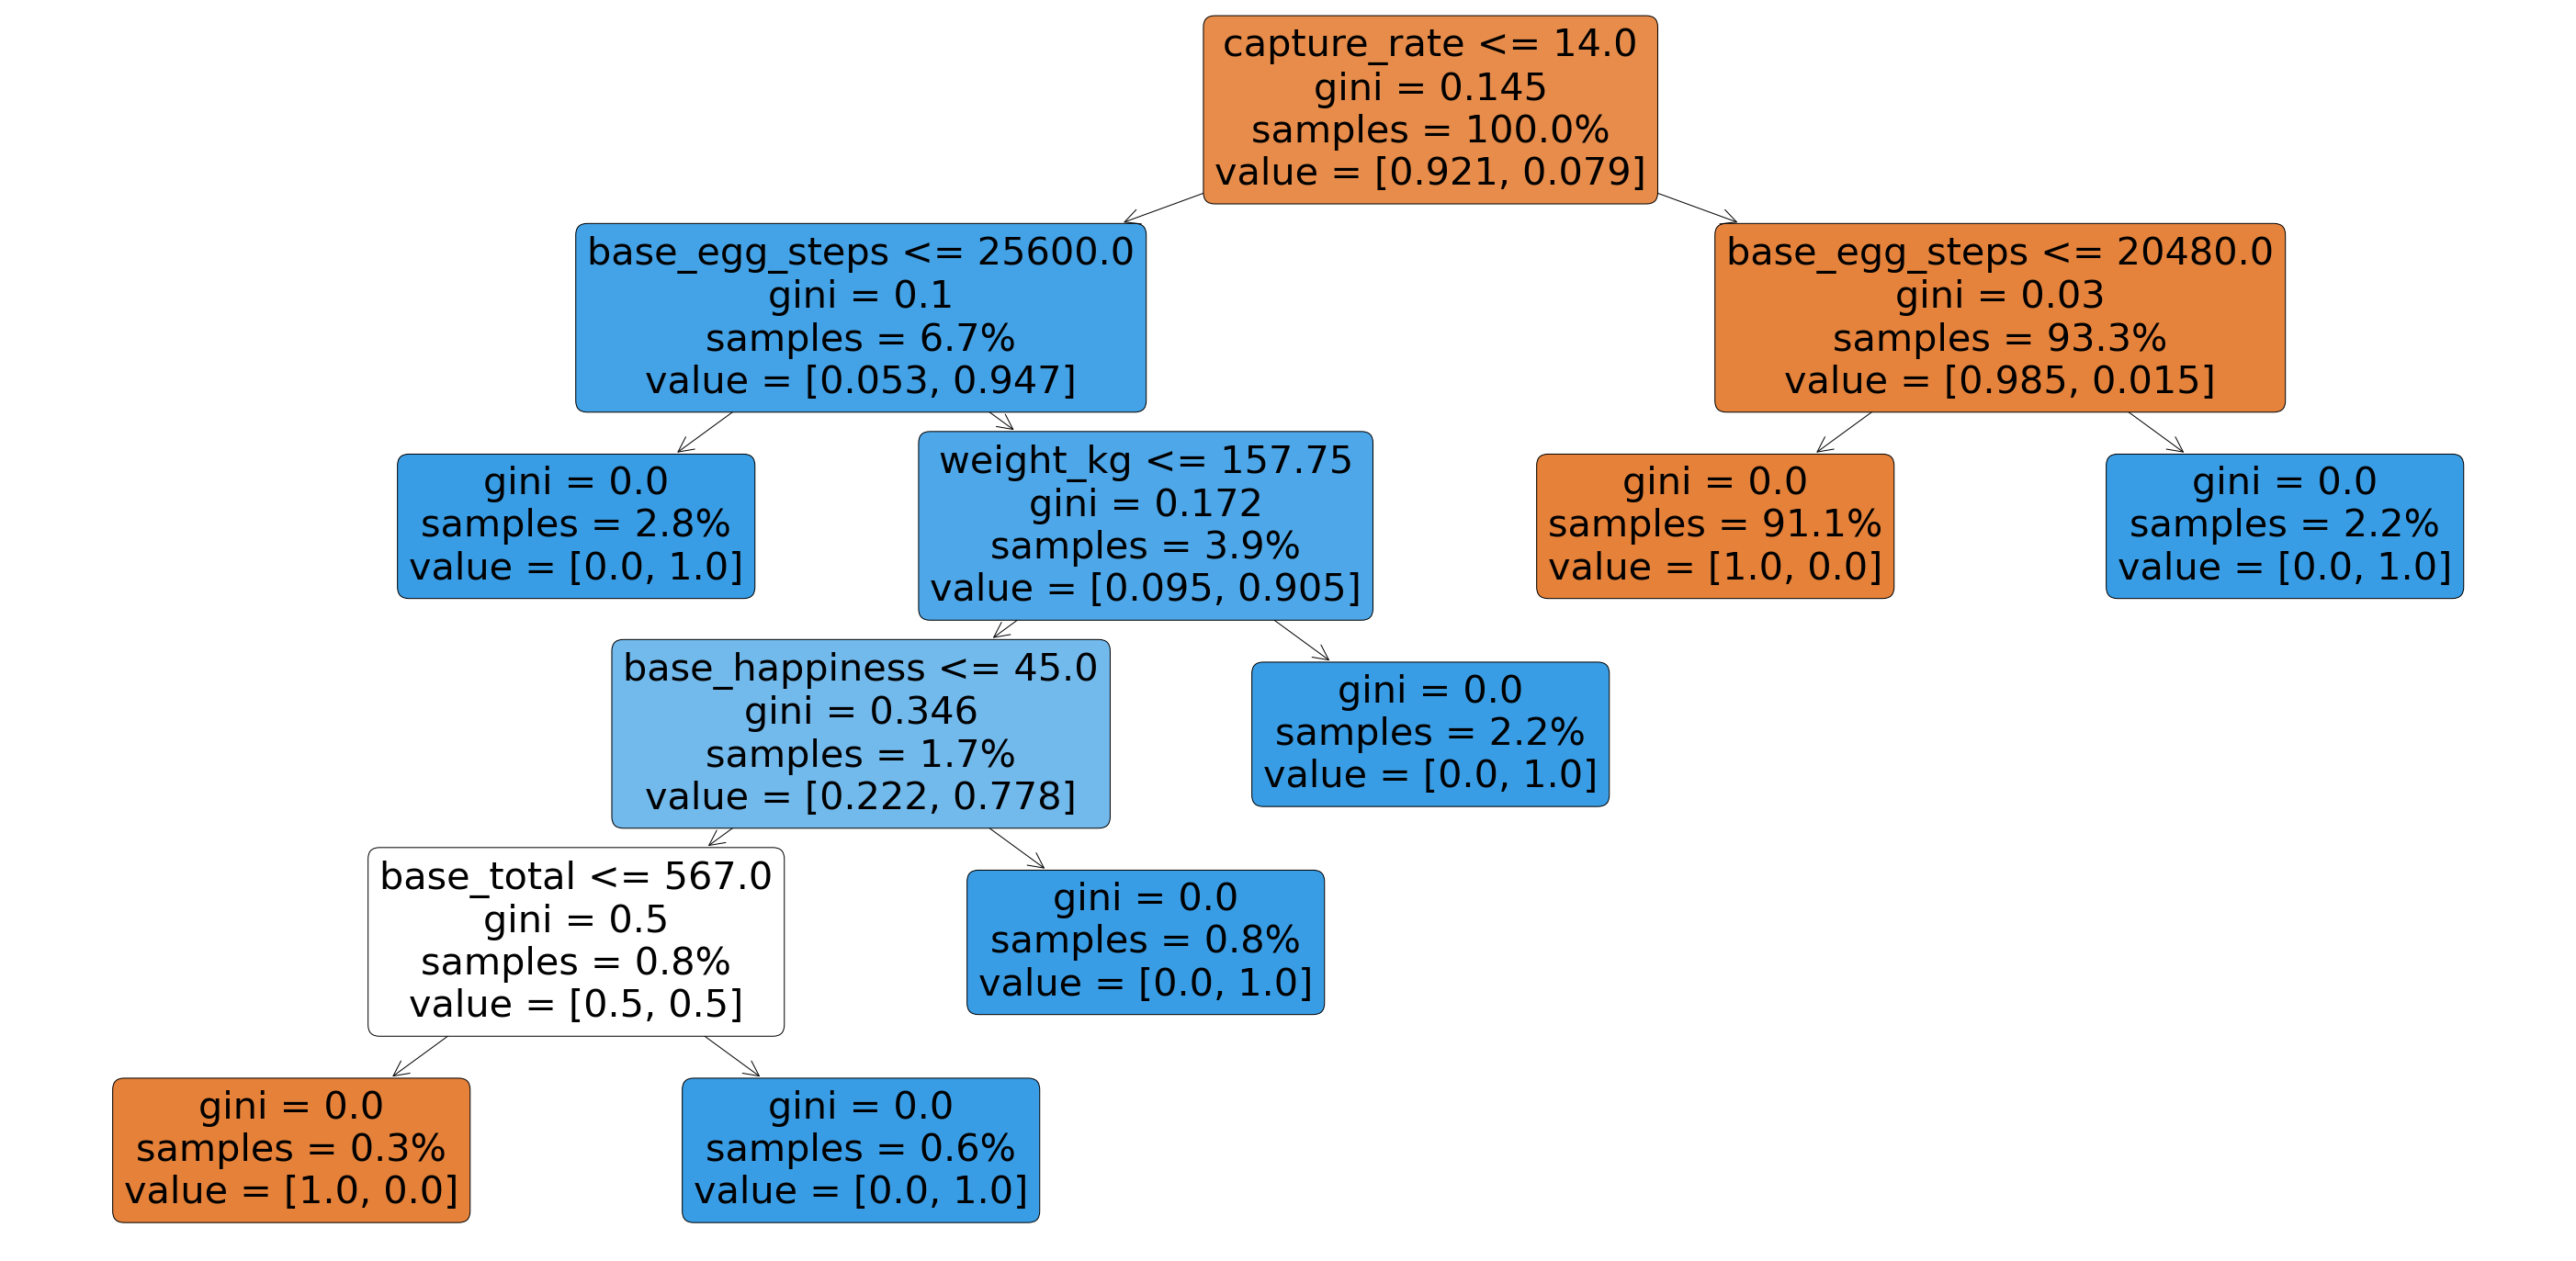

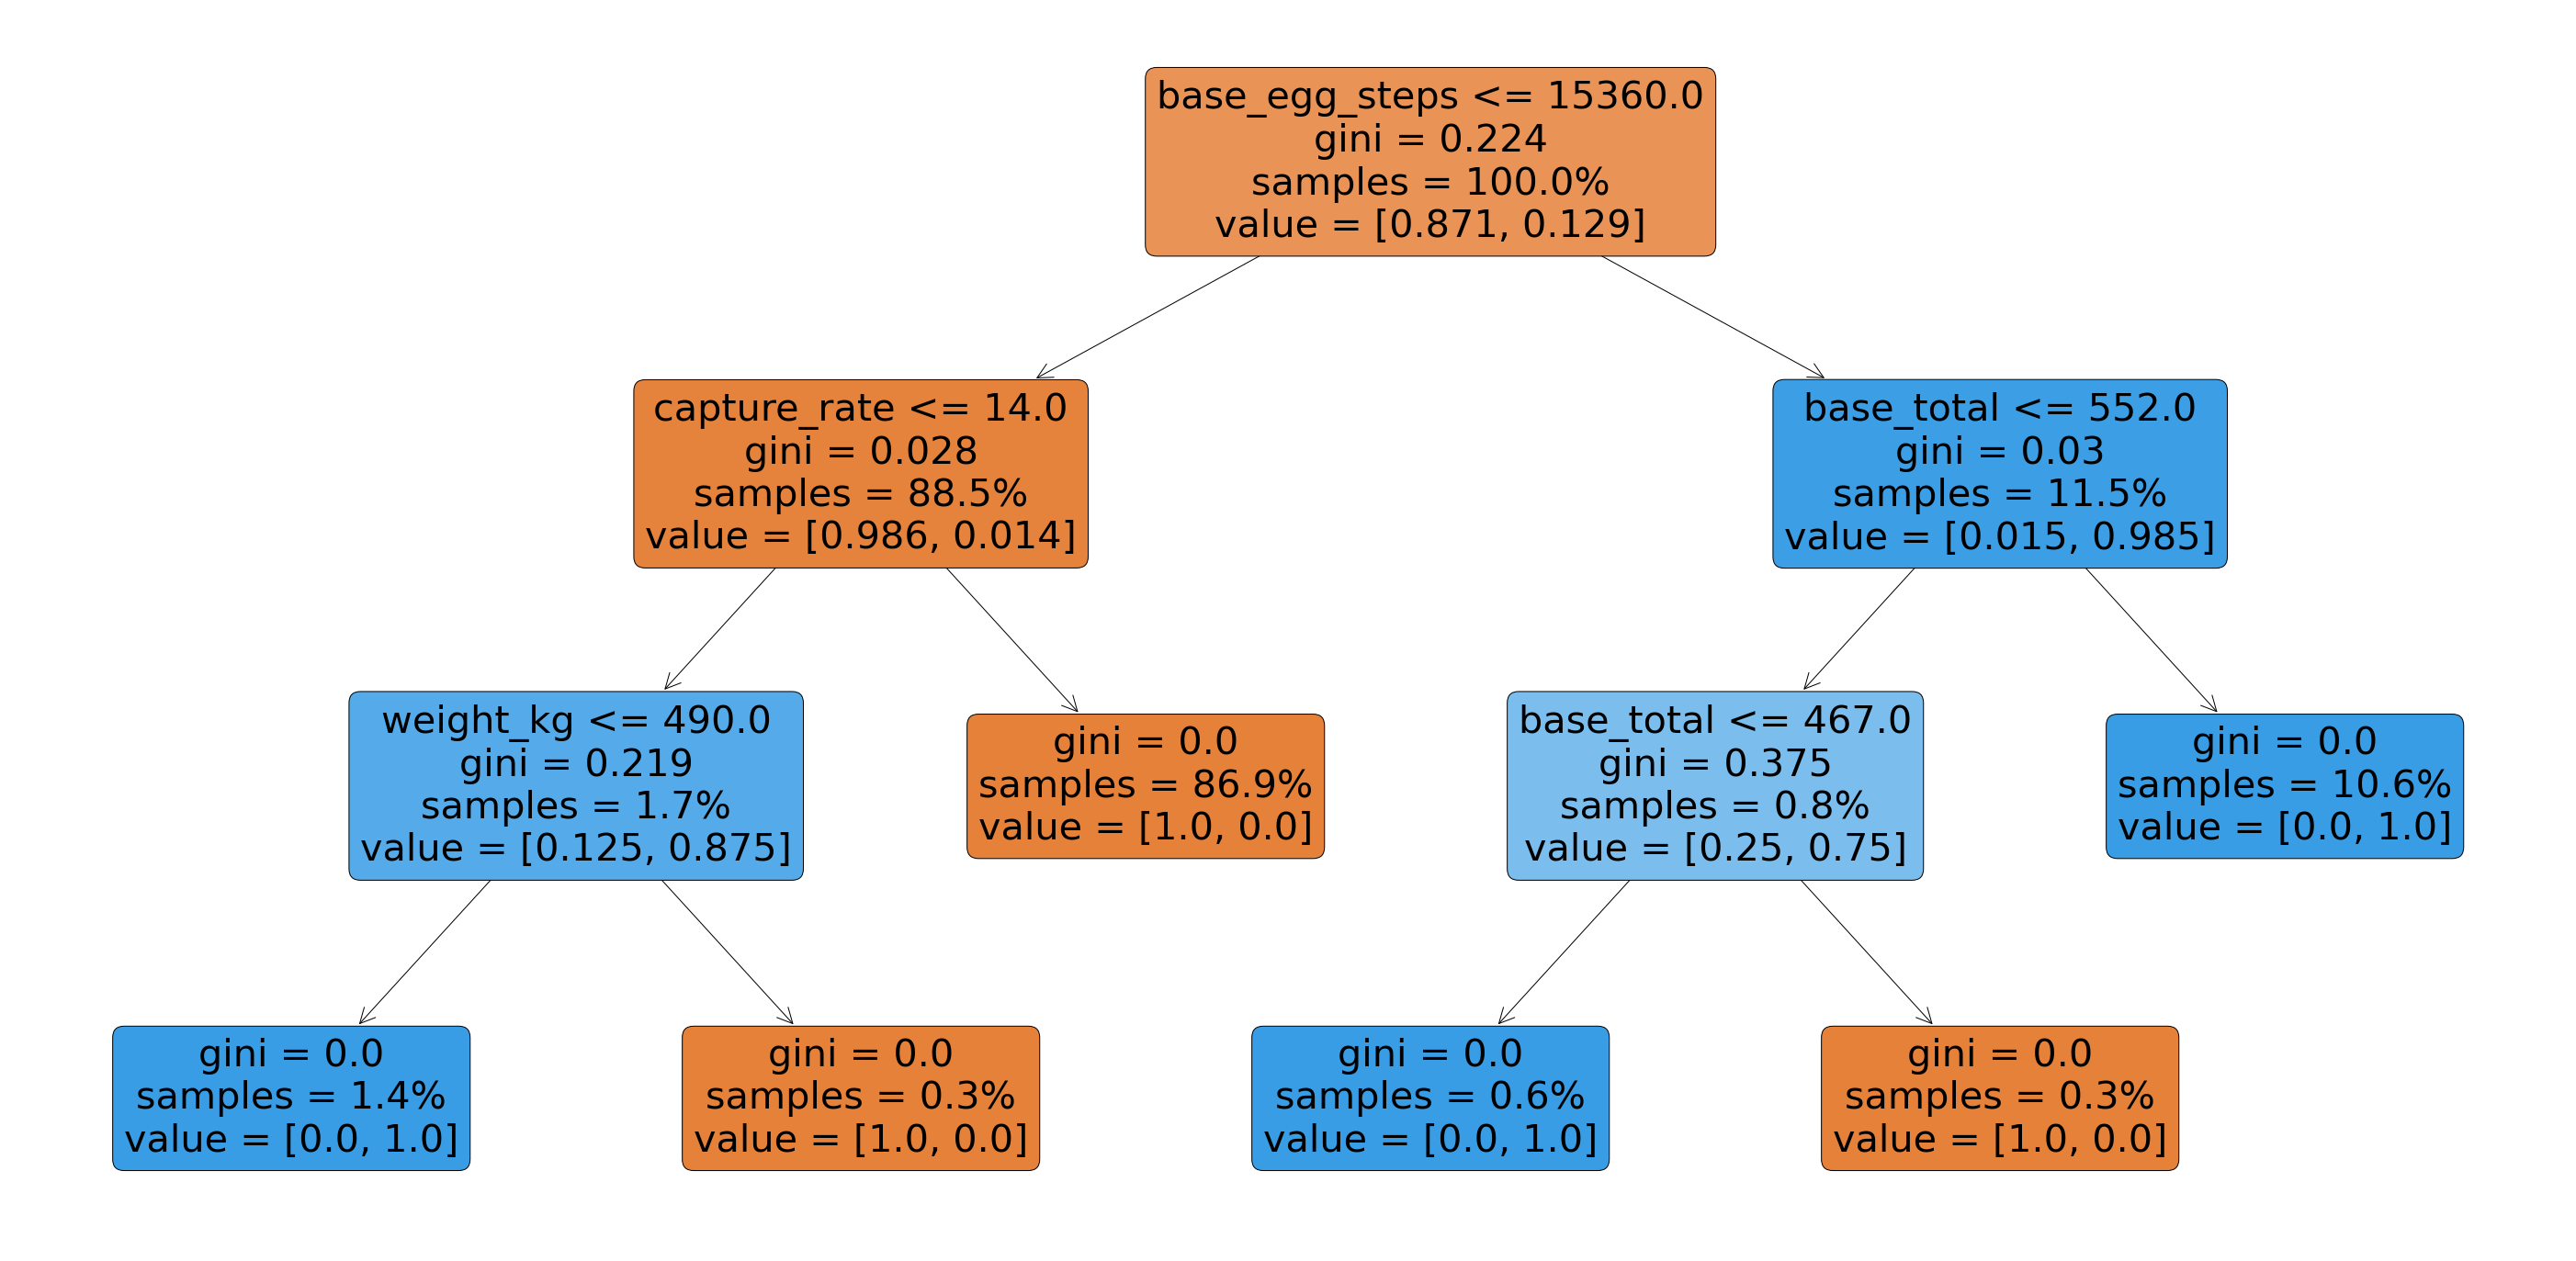

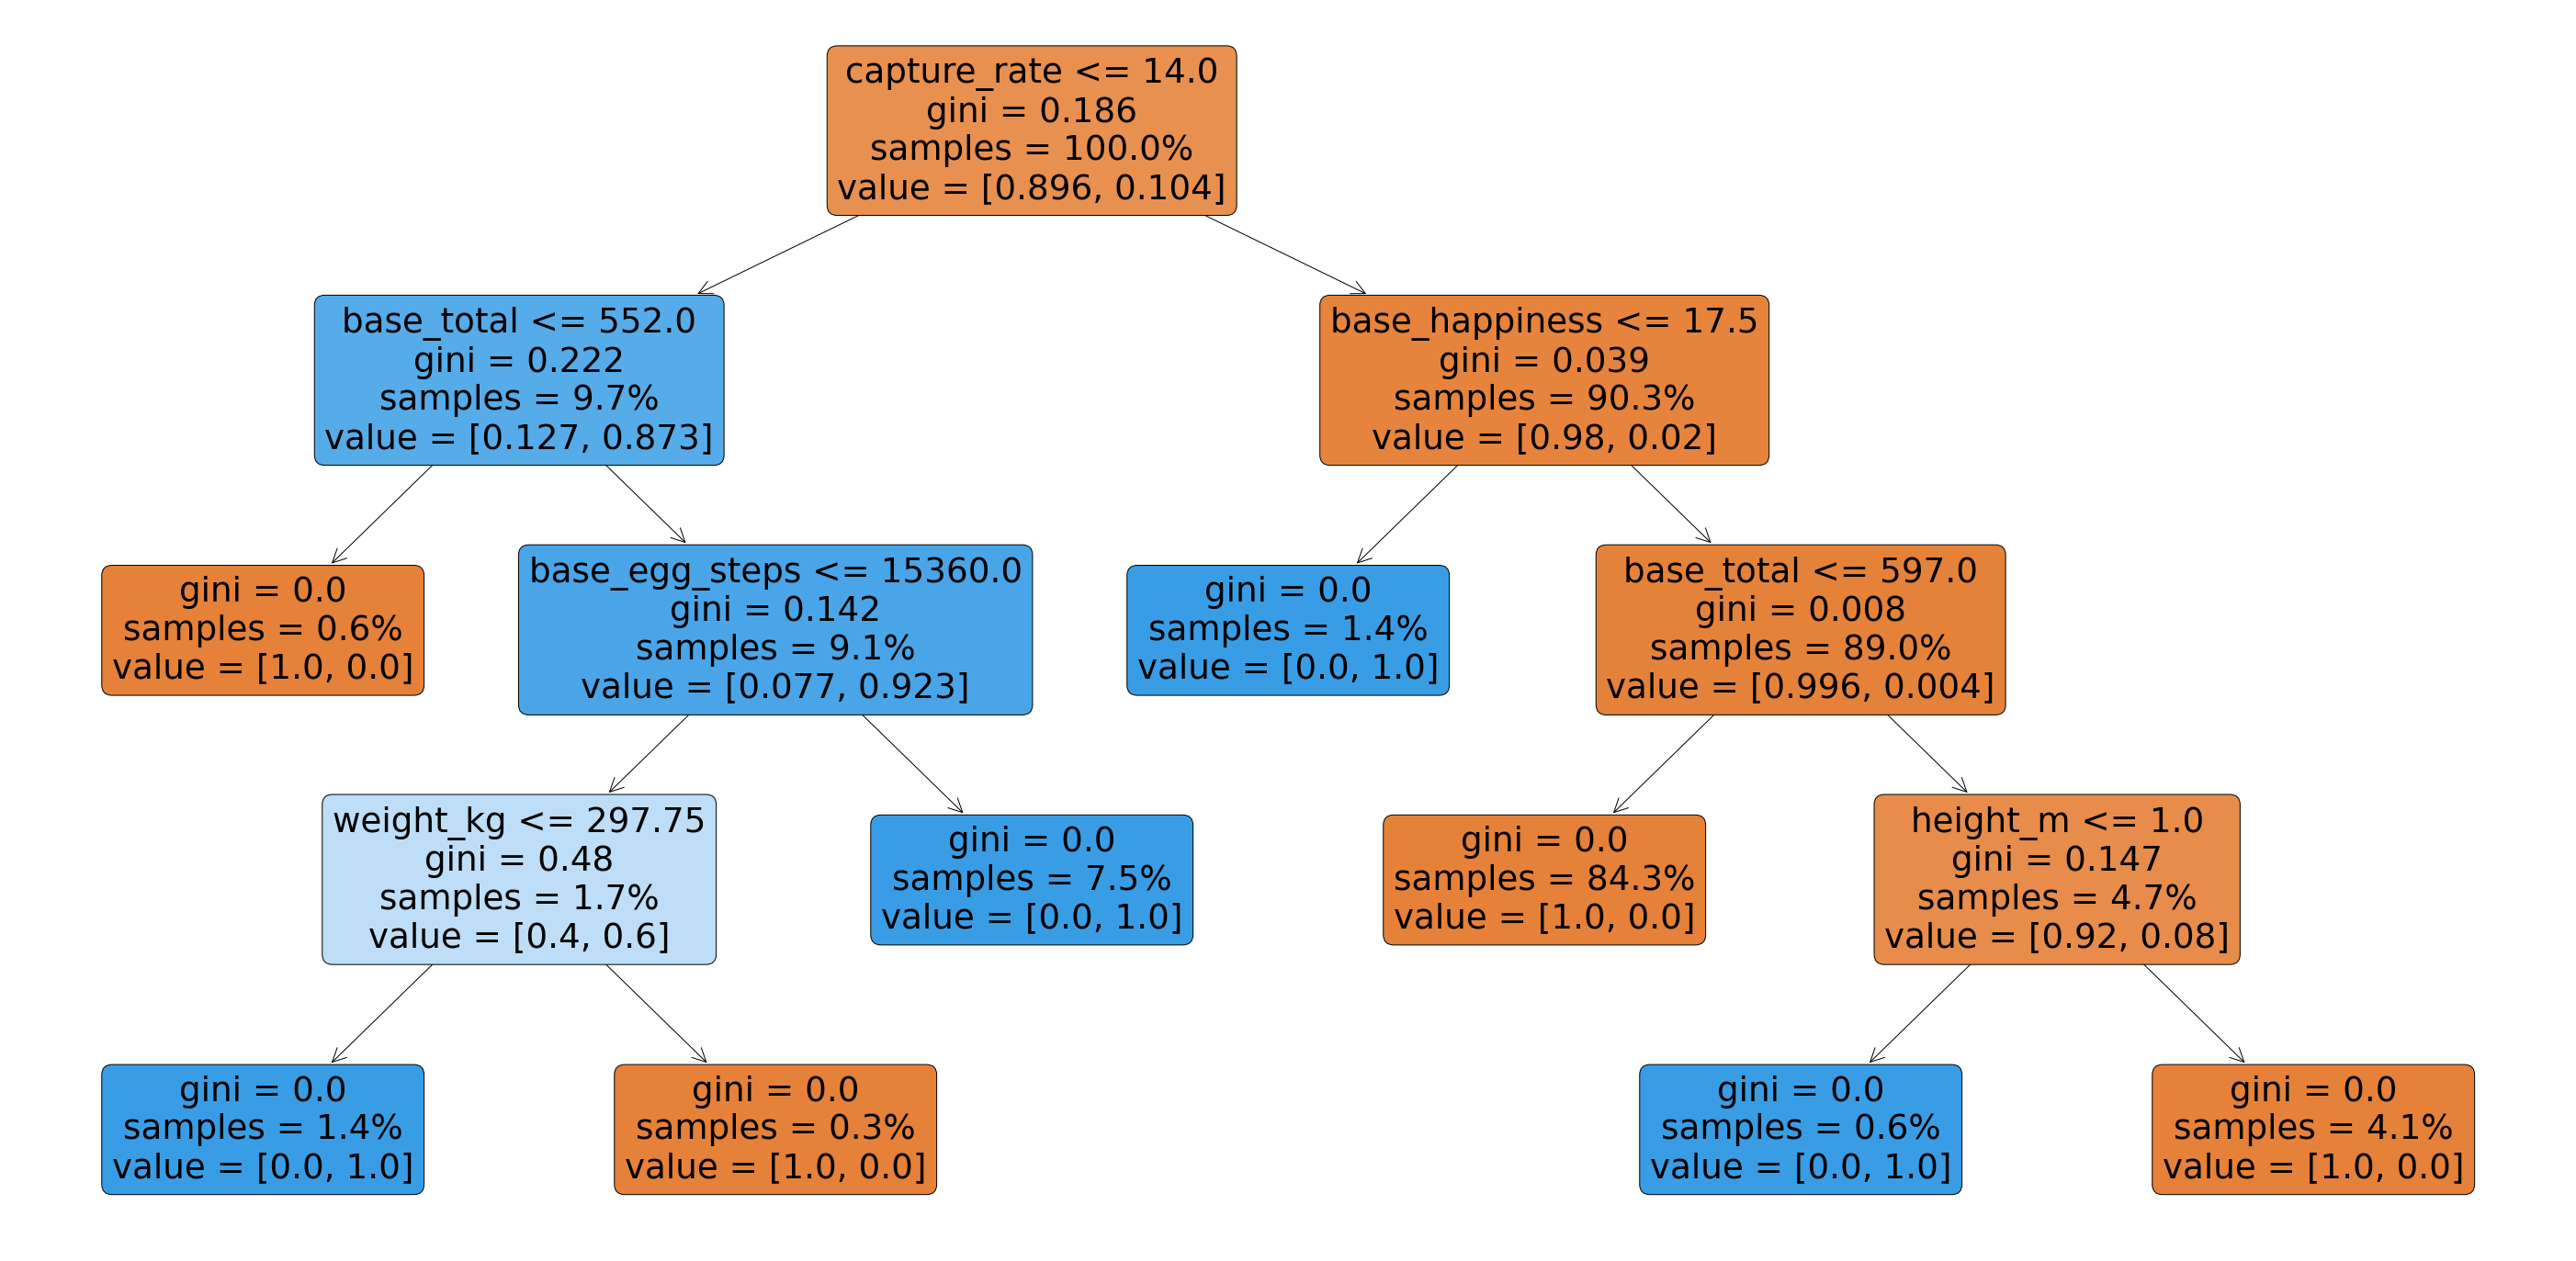

In [29]:
from sklearn import tree
for c in range(1,7):
    fig, ax = plt.subplots(figsize=(50, 25))
    tree.plot_tree(rfc.estimators_[c],feature_names=['base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'experience_growth', 'height_m', 'weight_kg',],filled=True,proportion=bool,rounded=True)

## Pikachu(random forest)

In [30]:
pikachu = [[2560,560,70,320,190,1000000,0.4]]
rfc.predict(pikachu)

array([0], dtype=int64)

## Mewtwo(decision tree)

In [31]:
mewtwo=[[30720,0,680,3,1250000,2,122]]
dtree.predict(mewtwo)

array([1], dtype=int64)

## Salamence(pókemon pseudo-lendário, atributos semelhantes aos lendários mas que não são)


In [32]:
salamence=[[10240,35,600,45,1250000,1.5,102.6]]
rfc.predict(salamence)

array([0], dtype=int64)

## Ótimos resultados!!